<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/CritterSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# import libraries
import random
import matplotlib.pyplot as plt

In [44]:
""""Global variables can be accessed from anywhere.
Keep them to min b/c makes program confusing and requires lots of computing power
Local variables have limited scope - can only be accessed in the function they reside"""

# initial global parameters - variables that can be accessed anywhere
startPopulation = 50 # starting pop
year = 0 # starting year
resources = 2 # # units of food each able critter can make
food = 0 # total value of food available (able critters*resources)
fertility_x = 10 # lowest age critter can give birth
fertility_y = 20 # highest age critter can give birth
disasterChance = 10 # chance of disaster occurring
critterList = [] # list to hold all critter objects
popList = [] # list for plot graph

In [45]:
# Define class Critter & pass parameters
# 1st parameter = self
# 2nd is age
# Every critter created will have age that we are tracking/modifying

class Critter:
    # add self & age to init b/c tracking age for all critters
    def __init__(self, age):
        #Parameters should include characteristics you want EVERY NEWLY CREATED CRITTER to have
        self.sex = random.randint(0,1) # 0=male, 1=female assigns random value of 0 or 1 to each critter
        self.age = age #set age differently based on diff factors


    # create gather() method so each critter can gather food
    # pass in the food & resources as parameters (arguments) - already declared as global vars
    def gather(food, resources):
        ableCritters = 0 # start w/ fresh value & then add on based on current pop
        # create for loop
        # if critter is b/w age 10-40, then they can go gather food
        for critter in critterList:
            # can set multiple conditions with and
            if critter.age > 10 and critter.age < 40: # if critter.age b/w 10 & 40 (11-39)
                ableCritters +=1 #increment ableCritters by 1 (+= shorthand for add 1)
        # OUTSIDE for loop calculate current food stores quantity
        food += ableCritters * resources # for every ableCritter will produce 2 units of food
        print(f"Food stockpile: {food}.") # print result of food stockpile
        print(f"Able critters: {ableCritters}.") # print # of ableCritters




      # Starvation/Death - If the current food stockpile can't feed every critter in a year,
        # need to reduce our critter population
        # include this in the gather() method b/c that handles food, resources

        # if there is less ableCritters to make food, then food depletes
        # check if food stockpile < than the amount of existing critters
        if food < len(critterList):
            del critterList[0:int(len(critterList) - food)] # delete slice of list based on # starving critters
                # b/c we start at begining of list, most likely killing older critters b/c they age
                # remove slice of list that's equal to amt of excess critters
            food = 0 # means no food = starvation
            #print statement if critter starve (food=0)
            print(f"Some critters starved! :-(")
        else:
            #if there is food, remove food equal to amt of critters, rest is stored for next yr
            food -= len(critterList)

        #print the overall results
        print(f"Population after starvation/feeding is: {len(critterList)}.")
        print(f"After eating, food stockpile is currently at {food}.")


    # Create reproduce() method so each critter can reproduce
    def reproduce(fertility_x, fertility_y): # Add 2 aged related fertility parameters (defined in global var)

        #Right below the def reproduce() but before for loop, create local variable to record initial # of critters
        # Set that equal to the length of the critterList (prior to successful reproduction)
        initial_pop = len(critterList)

        # Create for loop to check if each critter is a good candidate for birth
        for critter in critterList: # cycle through each critter in the list
            # Create nested if statements to check if female critters of reprod age have a chance for successful reprod
            if critter.sex == 1:    # if the critter is female and of defined fertile age
                if critter.age >= fertility_x: # if female critter is >= 10
                    if critter.age <= fertility_y: # and if female critter is <= 20
                        if random.randint(0, 4) == 1:  # if first 3 if statements are TRUE = 1 in 5 (20%) chance of pregnancy
                            critterList.append(Critter(0)) # add newborn critter to critterList w/ age 0


        # After reprod if statements & OUTSIDE for loop, compare initial value w/ new length of critterList post reproduction
        if initial_pop < len(critterList): #if critterList post repro > than initial pop
            print("New critters were born!") # print statement


In [46]:
# populate simulation w/ critters
# create function

def popSim():
    # for each # from 0-50 (startpop=50), do next line - loop happens 50x
    for x in range(startPopulation):
        #append a new Critter object in the critterList w/ a random age b/w 2 and 45
        #Class Critter requires an age parameter (so that is what random.randin(2,45))
        critterList.append(Critter(random.randint(2, 45)))
    # print the length of the critterList (50)
    print(len(critterList))


    #CHALLENGE - How can you see each critter's age?
    # print out age for each critter in critterList
    # need a for loop - for each critter object in the critterList
    # Each critter object has age parameter

    # for critter in critterList:
    #     print(critter.age) # print out the age (object.age)

In [47]:
# call the function
popSim()

# call the methods - methods require object or class to act upon
#class.method(parameter1, parameter2...)
Critter.gather(food, resources) #should be 2:1 food:critter ratio
Critter.reproduce(fertility_x, fertility_y)

50
Food stockpile: 70.
Able critters: 35.
Population after starvation/feeding is: 50.
After eating, food stockpile is currently at 20.
New critters were born!


In [48]:
# Create function that lets simulation run through year & age of critters
# Standalone function = create in new cell below popSim() function & method calls

# include 4 arguments b/c want to pass them into Critter method calls
def runYear(food, resources, fertility_x, fertility_y):
    # call gather() & reproduce() methods at beginning of year
    #B/c we call them OUTSIDE of class = must include class Critter before method names
    Critter.gather(food, resources)
    Critter.reproduce(fertility_x, fertility_y)

    # Goal - age existing critters by 1, if over age 50, they die = remove from critterList
    # for loop to loop through all critters
    for critter in critterList:
        # if critters > 50 = die, then remove from list
        if critter.age > 50:
            critterList.remove(critter)
        # else if they are < 50, age them up (increment) by 1
        else:
            critter.age += 1


        # Environmental Disasters
    # Include under runYear() b/c each yr has potential disaster
    # IF statement - if random # b/w (0, 100) is < 10 (disaster chance 0-9)
    if random.randint(0, 10) < disasterChance:
        # delete critters from list by taking slice
        # generate random # b/w 5-20% to see how much damage happens
        # multiply above value by length of critterList to get 5-20% of pop & delete slice
        del critterList[0:int(random.uniform(0.05, 0.2)* len(critterList))]
        # print out statement if disaster happens
        print(f"A disaster has occurred!")
        # print out survivng pop
        print(f"There are now {len(critterList)} surviving critters.")

    #OUTSIDE OF FOR LOOP - print out survivng critters post reprod & disaster
    print(f"After reproducing and/or disasters, critter population is currently {len(critterList)}.")
    popList.append(len(critterList)) # adds current pop to list at end of year

--------The Critter Simulation has begun!---------


101


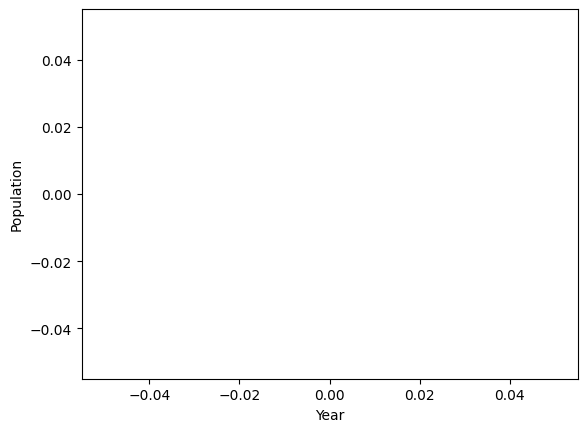

In [49]:
#Plan is to run simulation for X # of years & print out annual results
#Must create while loop that runs simulation until certain conditions met
# 1. Print msg to say the simulation started
# 2. Run the popSim() function to initially populate critter species
# 3. Use while loop to make sure program fulfills certain conditions: pop < 100, pop > 1
# 4. If the pop conditions satisfied, continue to run year function & increment year by 1
# 5. 	5. Print year to screen to track sim - use f-string


print("--------The Critter Simulation has begun!---------\n\n")
popSim()
while len(critterList) < 100 and len(critterList) > 1:
    runYear(food, resources, fertility_x, fertility_y)
    year += 1
    print(f"Current year: {year}\n")


# Visualize the results - much more user friendly than the reports
# plot the results AFTER the while loop (outside of it)

# evenly sampled time at 200ms intervals
plt.plot(popList, color= '#00FF00', lw=1, ls='--', marker='.', ms='2')
plt.ylabel('Population')
plt.xlabel('Year')
plt.show()